In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [3]:
engine=create_engine("sqlite:///Resources/hawaii.sqlite")
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()
# Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement

In [4]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [5]:
inspector=inspect(engine)

m_columns=inspector.get_columns('measurement')
print('measurement')
for m in m_columns:
    print(m['name'])
    
s_columns=inspector.get_columns('station')
print('stations')
for s in s_columns:
    print(s['name'])

measurement
id
station
date
prcp
tobs
stations
id
station
name
latitude
longitude
elevation


In [6]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9afd3f0310>,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [7]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [8]:
# Calculate the date 1 year ago from the last data point in the database:

query_date=dt.date(2017,8,23)-dt.timedelta(days=365)
print("Querydate:",query_date)

# Perform a query to retrieve the data and precipitation scores
last_months=session.query(Measurement.date,Measurement.prcp).\
            filter(Measurement.date > query_date).\
            order_by(Measurement.date).all()
last_months

Querydate: 2016-08-23


[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [9]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(last_months)
df


,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [10]:
date_prcp=df.to_csv("date_prcp.csv")

In [11]:
# Sort the dataframe by date
df=df.dropna(how='any')
df.set_index('date', inplace=True)
df = df.sort_values(by="date")

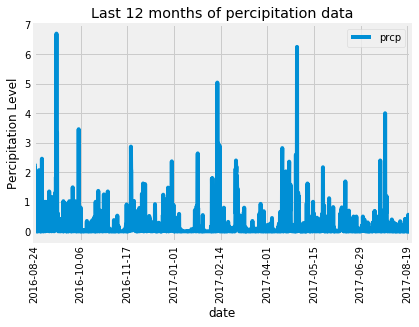

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
ax=df.plot(rot=90)
ax.set_ylabel('Percipitation Level')
ax.set_title("Last 12 months of percipitation data")
plt.show()


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.agg({'prcp':['min','max','mean','median','std']})
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9afd681710>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'elevation': 3.0}

In [16]:
#total number of stations
total_station=session.query(Station).count()
print("Total no of station:",total_station)

Total no of station: 9


In [17]:
 # What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel=[Measurement.station,
     func.count(Measurement.id)]

activestation=session.query(*sel).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.id).desc()).all()
activestation


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
#Which station has the highest number of observations?

highest_obs=activestation[0][0]
print(f"The station which has the  higest number of observation is :{highest_obs},{activestation[0][1]}")

The station which has the  higest number of observation is :USC00519281,2772


In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

summary_obs=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
        filter(Measurement.station==highest_obs).all()


print(f"Min Max and Avg of the highest observation station:{summary_obs}")


Min Max and Avg of the highest observation station:[(54.0, 85.0, 71.66378066378067)]


In [20]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
    # Filter by the station with the highest number of observations.

temp=session.query(Measurement.station,Measurement.date,Measurement.tobs).\
     filter(Measurement.station==highest_obs).\
     filter(Measurement.date > query_date).\
     order_by(Measurement.date).all()
temp



[('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC00519281', '2016-09-18', 78.0),
 ('USC005192

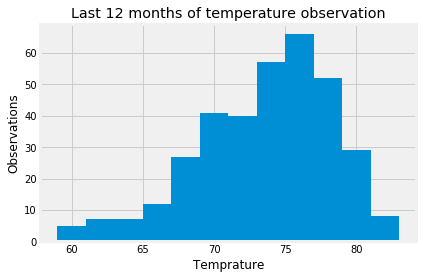

In [21]:
# Plot the results as a histogram with bins=12
temp_df=pd.DataFrame(temp)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Temprature")
plt.ylabel("Observations")
plt.title("Last 12 months of temperature observation")
plt.show()